In [1]:
import pandas as pd
import datetime
import numpy as np
import warnings

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['SimHei']  # 画图显示中文
path = "D:/program/program1/User_portrait/"

In [2]:
data_company = pd.read_csv(path + "20190301.csv", names = ['order_date', 'company', 'total_freight'])

In [3]:
data_company = data_company[data_company['total_freight'] >= 1]

In [4]:
data_company['order_date'] = pd.to_datetime(data_company['order_date'], format = '%Y-%m-%d')

In [5]:
data_company['data_diff'] = pd.to_datetime('today') - data_company['order_date']

In [6]:
data_company['data_diff'] = data_company['data_diff'].dt.days

In [7]:
R_data = data_company.groupby(by = 'company')['data_diff'].agg({'recency' : np.min})

In [8]:
F_data = data_company.groupby(by = 'company')['order_date'].agg({'frequency':np.size})

In [9]:
M_data = data_company.groupby(by = 'company')['total_freight'].agg({'monetary':np.sum})

In [10]:
rfm_data = pd.concat([R_data, F_data, M_data], axis = 1)

In [11]:
rfm_data['frequency'].describe()

count    223501.000000
mean         16.527944
std          30.518144
min           1.000000
25%           1.000000
50%           3.000000
75%          14.000000
max         161.000000
Name: frequency, dtype: float64

In [12]:
rfm_data['frequency'].quantile(q = np.linspace(0,1,6), interpolation = 'nearest')

0.0      1
0.2      1
0.4      2
0.6      5
0.8     21
1.0    161
Name: frequency, dtype: int64

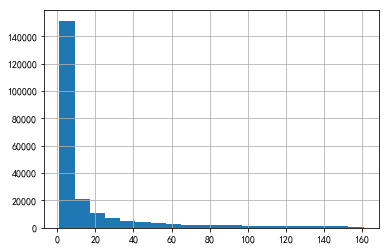

In [13]:
rfm_data['frequency'].sort_values().hist(bins = 20)

In [14]:
rfm_data.head()

,recency,frequency,monetary
company,,,
01个人刘健,65,2,669.00
3M苏州,82,8,4452.50
66号定制家居,43,6,12928.60
Dotwil点为商城,34,4,635.79
IT中心测试,42,3,217.00


In [15]:
def create_label(data, n, mark):
    bins = data.quantile(q = np.linspace(0,1,n), interpolation = 'nearest')
    bins[0] = 0
    if mark == 1:
        labels = [5, 4, 3, 2, 1]
    elif mark == 2:
        labels = [1, 2, 3, 4, 5]
    else:
        labels = [1, 2, 3, 4, 5, 6, 7, 8]
    label = pd.cut(data, bins = bins, labels = labels)
    return label

In [16]:
R_S = create_label(rfm_data['recency'], 6, 1)
F_S = create_label(rfm_data['frequency'], 6, 2)
M_S = create_label(rfm_data['monetary'], 6, 2)

In [17]:
rfm_data['R_S'] = R_S
rfm_data['F_S'] = F_S
rfm_data['M_S'] = M_S

In [18]:
rfm_data.dropna(axis = 0, inplace = True)

In [19]:
# rfm_data['rfm'] = 100 * rfm_data['R_label'].astype(int) + 10 * rfm_data['F_label'].astype(int) + 1 * rfm_data['M_label'].astype(int)

In [20]:
# rfm_data['level'] = create_label(rfm_data['rfm'], 9, 3)

In [21]:
rfm_data.head()

,recency,frequency,monetary,R_S,F_S,M_S
company,,,,,,
01个人刘健,65,2,669.00,3,2,2
3M苏州,82,8,4452.50,2,4,4
66号定制家居,43,6,12928.60,4,4,5
Dotwil点为商城,34,4,635.79,5,3,2
IT中心测试,42,3,217.00,4,3,1


In [22]:
rfm_data['frequency'].mean()

16.527943946559525

In [23]:
rfm_data['R_label'] = 0
rfm_data['F_label'] = 0
rfm_data['M_label'] = 0
rfm_data.loc[rfm_data['recency'] < rfm_data['recency'].mean(), ['R_label']] = 1
rfm_data.loc[rfm_data['frequency'] > rfm_data['frequency'].mean(), ['F_label']] = 1
rfm_data.loc[rfm_data['monetary'] > rfm_data['monetary'].mean(), ['M_label']] = 1

In [22]:
# rfm_data = rfm_data.assign(R_label = rfm_data['R_S'].map(lambda x : 1 if x > rfm_data['R_S'].astype(int).mean() else 0),
#                            F_label = rfm_data['F_S'].map(lambda x : 1 if x > rfm_data['F_S'].astype(int).mean() else 0),
#                            M_label = rfm_data['M_S'].map(lambda x : 1 if x > rfm_data['M_S'].astype(int).mean() else 0))

In [24]:
rfm_data.head()

,recency,frequency,monetary,R_S,F_S,M_S,R_label,F_label,M_label
company,,,,,,,,,
01个人刘健,65,2,669.00,3,2,2,1,0,0
3M苏州,82,8,4452.50,2,4,4,0,0,0
66号定制家居,43,6,12928.60,4,4,5,1,0,0
Dotwil点为商城,34,4,635.79,5,3,2,1,0,0
IT中心测试,42,3,217.00,4,3,1,1,0,0


In [25]:
rfm_data['rfm'] = rfm_data['R_label'].map(str) + rfm_data['F_label'].map(str) + rfm_data['M_label'].map(str)

In [26]:
rfm_data.head()

,recency,frequency,monetary,R_S,F_S,M_S,R_label,F_label,M_label,rfm
company,,,,,,,,,,
01个人刘健,65,2,669.00,3,2,2,1,0,0,100
3M苏州,82,8,4452.50,2,4,4,0,0,0,000
66号定制家居,43,6,12928.60,4,4,5,1,0,0,100
Dotwil点为商城,34,4,635.79,5,3,2,1,0,0,100
IT中心测试,42,3,217.00,4,3,1,1,0,0,100


In [27]:
rfm_data['custom'] = np.NaN
rfm_data.loc[rfm_data['rfm'] == '111', ['custom']] = '重要价值客户'
rfm_data.loc[rfm_data['rfm'] == '011', ['custom']] = '重要保持客户'
rfm_data.loc[rfm_data['rfm'] == '101', ['custom']] = '重要发展客户'
rfm_data.loc[rfm_data['rfm'] == '001', ['custom']] = '重要挽留客户'
rfm_data.loc[rfm_data['rfm'] == '110', ['custom']] = '一般价值客户'
rfm_data.loc[rfm_data['rfm'] == '100', ['custom']] = '一般发展客户'
rfm_data.loc[rfm_data['rfm'] == '010', ['custom']] = '一般保持客户'
rfm_data.loc[rfm_data['rfm'] == '000', ['custom']] = '一般挽留客户'

111:重要价值客户, 101:重要发展客户, 011:重要保持客户，001:重要挽留客户, 110:一般价值客户,100:一般发展客户, 010:一般保持客户,000：一般挽留客户

In [28]:
rfm_data.head()

,recency,frequency,monetary,R_S,F_S,M_S,R_label,F_label,M_label,rfm,custom
company,,,,,,,,,,,
01个人刘健,65,2,669.00,3,2,2,1,0,0,100,一般发展客户
3M苏州,82,8,4452.50,2,4,4,0,0,0,000,一般挽留客户
66号定制家居,43,6,12928.60,4,4,5,1,0,0,100,一般发展客户
Dotwil点为商城,34,4,635.79,5,3,2,1,0,0,100,一般发展客户
IT中心测试,42,3,217.00,4,3,1,1,0,0,100,一般发展客户


In [29]:
rfm_c1 = list(rfm_data['custom'].value_counts().sort_index()) # 统计每个类别个数
rfm_c2 = list(rfm_data['custom'].value_counts().sort_index()/len(rfm_data)*100)
rfm_c3 = list(map(lambda x: str(round(x, 2)) + '%', rfm_c2))
# 每个类别金额占比
rfm_sum = rfm_data['monetary'].groupby(rfm_data['custom']).sum()
rfm_percent = rfm_sum/rfm_data['monetary'].sum() * 100
rfm_c4 = rfm_percent.map(lambda x : str(round(x, 2)) + "%")

rfm_c = pd.DataFrame({'数量': rfm_c1, '客户类型占比': rfm_c3, '运费占比' : rfm_c4})
rfm_c

,数量,客户类型占比,运费占比
custom,,,
一般价值客户,23292,10.42%,4.81%
一般保持客户,1178,0.53%,0.19%
一般发展客户,86166,38.55%,5.15%
一般挽留客户,84417,37.77%,2.48%
重要价值客户,26018,11.64%,84.54%
重要保持客户,516,0.23%,1.16%
重要发展客户,1483,0.66%,1.21%
重要挽留客户,431,0.19%,0.46%


In [30]:
rfm_c.reset_index().head()

,custom,数量,客户类型占比,运费占比
0,一般价值客户,23292,10.42%,4.81%
1,一般保持客户,1178,0.53%,0.19%
2,一般发展客户,86166,38.55%,5.15%
3,一般挽留客户,84417,37.77%,2.48%
4,重要价值客户,26018,11.64%,84.54%


In [31]:
pd.merge(rfm_data, rfm_c, on = 'custom', how = 'left').head()

,recency,frequency,monetary,R_S,F_S,M_S,R_label,F_label,M_label,rfm,custom,数量,客户类型占比,运费占比
0,65,2,669.00,3,2,2,1,0,0,100,一般发展客户,86166,38.55%,5.15%
1,82,8,4452.50,2,4,4,0,0,0,000,一般挽留客户,84417,37.77%,2.48%
2,43,6,12928.60,4,4,5,1,0,0,100,一般发展客户,86166,38.55%,5.15%
3,34,4,635.79,5,3,2,1,0,0,100,一般发展客户,86166,38.55%,5.15%
4,42,3,217.00,4,3,1,1,0,0,100,一般发展客户,86166,38.55%,5.15%


In [32]:
rfm_data[rfm_data['rfm'] == '111'].head(10)

,recency,frequency,monetary,R_S,F_S,M_S,R_label,F_label,M_label,rfm,custom
company,,,,,,,,,,,
Syneventive,31,123,287274.3,5,5,5,1,1,1,111,重要价值客户
三河个人孟显明,54,50,21306.7,3,5,5,1,1,1,111,重要价值客户
三河华巨同方,43,22,89738.8,4,5,5,1,1,1,111,重要价值客户
三河多米来电子,41,78,34653.4,4,5,5,1,1,1,111,重要价值客户
三河正海,43,20,46751.9,4,4,5,1,1,1,111,重要价值客户
三河热刺激光,35,102,457927.0,5,5,5,1,1,1,111,重要价值客户
三河航信通,38,21,24588.7,5,4,5,1,1,1,111,重要价值客户
三河雷翡士,40,64,58959.5,5,5,5,1,1,1,111,重要价值客户
三河飞嘉,39,106,96496.1,5,5,5,1,1,1,111,重要价值客户


In [33]:
k_data = rfm_data[['recency', 'frequency', 'monetary']]

In [34]:
min_max = k_data.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
min_max.head()

,recency,frequency,monetary
company,,,
01个人刘健,0.25000,0.00625,0.000028
3M苏州,0.35625,0.04375,0.000190
66号定制家居,0.11250,0.03125,0.000551
Dotwil点为商城,0.05625,0.01875,0.000027
IT中心测试,0.10625,0.01250,0.000009


In [35]:
# min_max =(k_data-k_data.mean())/k_data.std()
# min_max.head()

In [36]:
min_max.columns = ['SR', 'SF', 'SM']

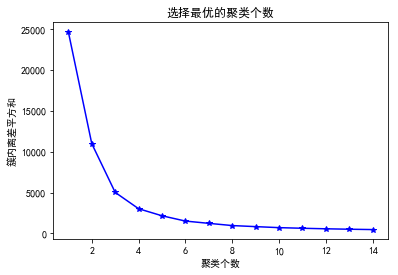

In [37]:
K = range(1,15)
GSSE = []
for k in K:
    SSE = []
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(min_max)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    SSE.append(kmeans.inertia_)
    GSSE.append(np.sum(SSE))

# kmeans.inertia_ : 计算点到簇中心的距离

# 绘制K的个数与GSSE的关系
plt.plot(K, GSSE, 'b*-')
plt.xlabel('聚类个数')
plt.ylabel('簇内离差平方和')
plt.title('选择最优的聚类个数')
plt.show()

In [38]:
print(GSSE)

[24632.34083480209, 10973.216323355957, 5016.403693620765, 3018.277391863767, 2155.684161403227, 1509.4999150341225, 1230.8135334988033, 960.3969865239991, 829.6086533821741, 706.0338208548993, 629.4645414650795, 564.651851171049, 512.432081685306, 469.9032179490151]


In [39]:
num_clusters = 8
kmeans = KMeans(n_clusters=num_clusters, random_state=21)
kmeans.fit(min_max)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=21, tol=0.0001, verbose=0)

In [40]:
k_data['cluster'] = kmeans.labels_ + 1

In [41]:
rfm_data['cluster']=k_data["cluster"]
rfm_data['cluster'] = rfm_data['cluster']
# 计算每个类别的数据量
kmeans_c1 = list(k_data["cluster"].value_counts().sort_index())

# 计算每个类别所占的百分比
kmeans_c2 = list(k_data["cluster"].value_counts().sort_index() / len(k_data) * 100)
kmeans_c3 = (list(map(lambda x: str(round(x, 2)) + "%", kmeans_c2)))

# 每个类别金额占比
kmeans_sum = k_data['monetary'].groupby(k_data['cluster']).sum()
kmeans_percent = kmeans_sum/k_data['monetary'].sum() * 100
kmeans_c4 = kmeans_percent.map(lambda x : str(round(x, 2)) + "%")

kmeans_c = pd.DataFrame({"cluster": range(1, len(kmeans_c1) + 1), "数量": kmeans_c1, "客户类型占比": kmeans_c3, "运费" : kmeans_sum, "运费占比" : kmeans_c4})
kmeans_c

,cluster,数量,客户类型占比,运费,运费占比
cluster,,,,,
1,1,29299,13.11%,6.372740e+07,1.71%
2,2,21673,9.7%,4.653501e+08,12.51%
3,3,21696,9.71%,2.461427e+07,0.66%
4,4,11997,5.37%,7.088937e+08,19.06%
5,5,67565,30.23%,2.408134e+08,6.47%
6,6,24978,11.18%,3.702123e+07,1.0%
7,7,9256,4.14%,2.096393e+09,56.35%
8,8,37037,16.57%,8.323713e+07,2.24%


In [42]:
rfm_data[rfm_data['cluster'] == 8].head()

,recency,frequency,monetary,R_S,F_S,M_S,R_label,F_label,M_label,rfm,custom,cluster
company,,,,,,,,,,,,
01个人刘健,65,2,669.0,3,2,2,1,0,0,100,一般发展客户,8
3M苏州,82,8,4452.5,2,4,4,0,0,0,000,一般挽留客户,8
TCL王牌电器成都,85,1,110.0,2,1,1,0,0,0,000,一般挽留客户,8
三亚个人李子敬,75,1,520.0,3,1,2,1,0,0,100,一般发展客户,8
三亚个人王宗杰,58,1,600.0,3,1,2,1,0,0,100,一般发展客户,8


In [43]:
rfm_data.loc[rfm_data['cluster'] == 8]['custom'].value_counts()

一般发展客户    25353
一般挽留客户    10029
一般价值客户      850
一般保持客户      254
重要发展客户      242
重要价值客户      169
重要保持客户       78
重要挽留客户       62
Name: custom, dtype: int64

In [44]:
a = rfm_data.loc[rfm_data['cluster'] == 8]
a[a['custom'] == '重要价值客户'].head()

,recency,frequency,monetary,R_S,F_S,M_S,R_label,F_label,M_label,rfm,custom,cluster
company,,,,,,,,,,,,
上海个人皮文建,77,22,29889.8,2,5,5,1,1,1,111,重要价值客户,8
上海伊升机电,76,26,22117.1,3,5,5,1,1,1,111,重要价值客户,8
上海利汉,62,23,24392.5,3,5,5,1,1,1,111,重要价值客户,8
上海固牛,73,26,17976.4,3,5,5,1,1,1,111,重要价值客户,8
上海奥昌(闵行),76,17,28142.4,3,4,5,1,1,1,111,重要价值客户,8


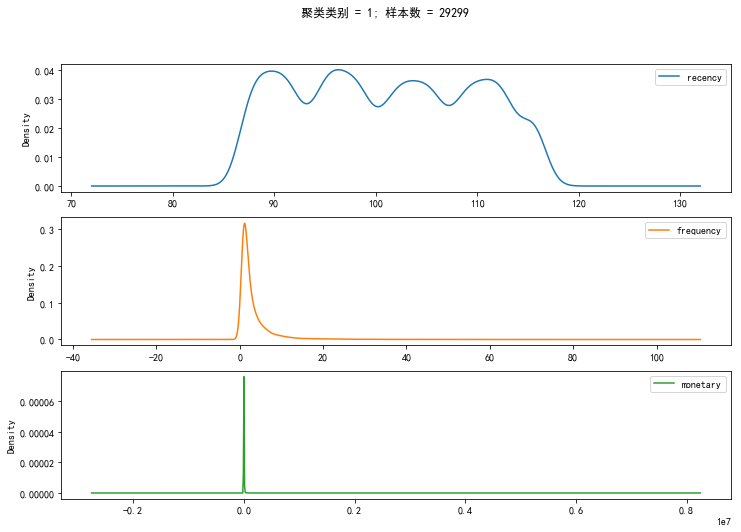

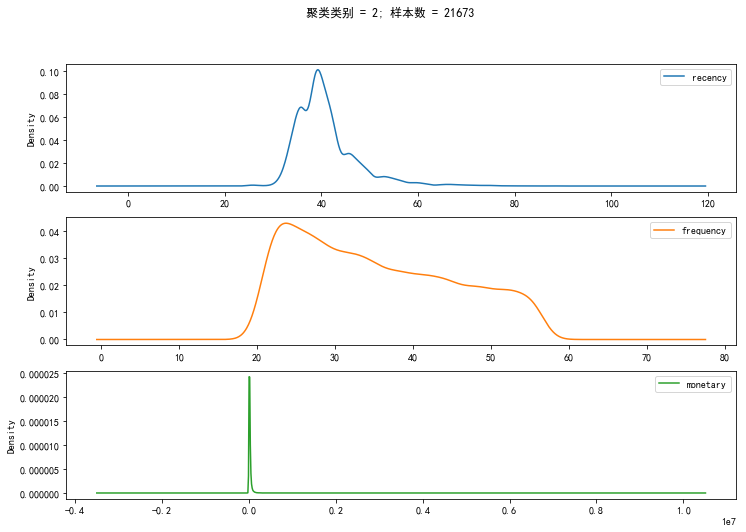

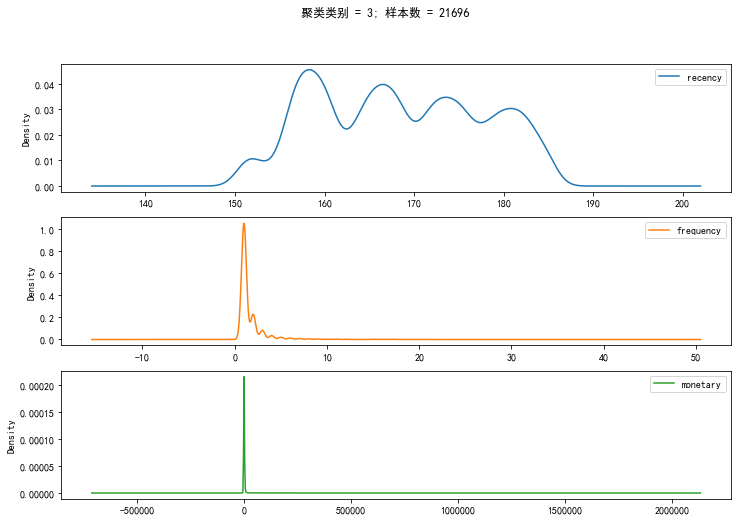

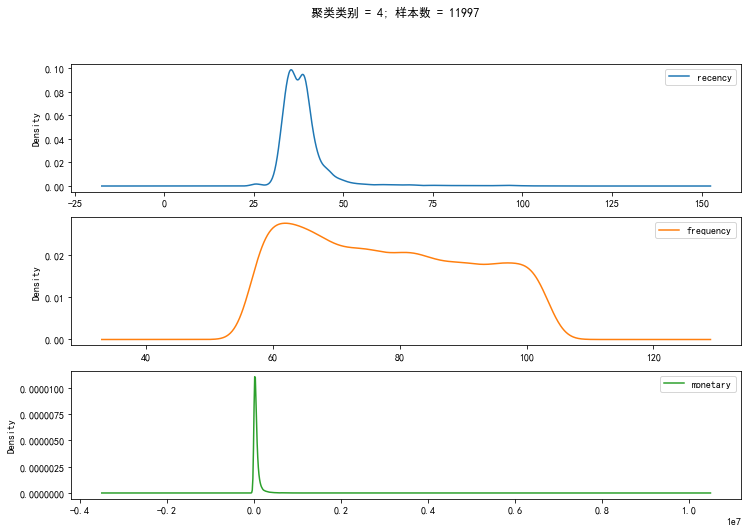

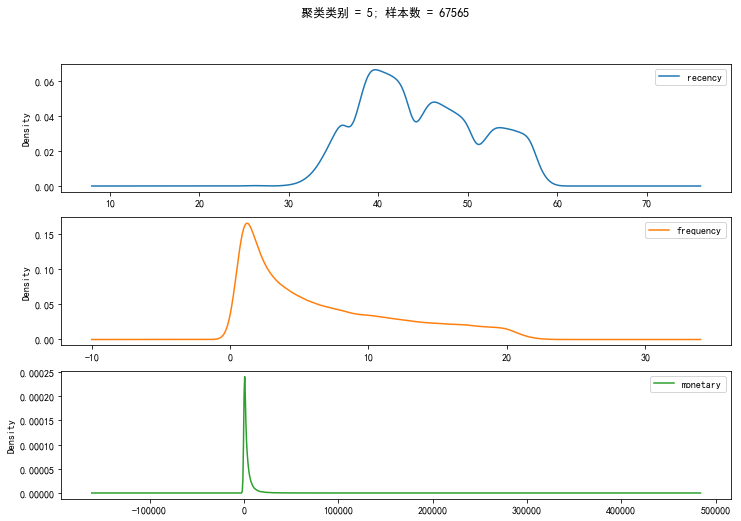

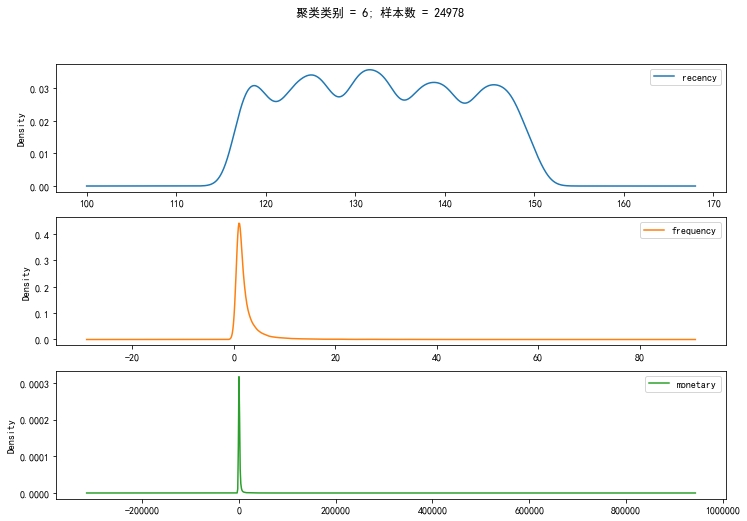

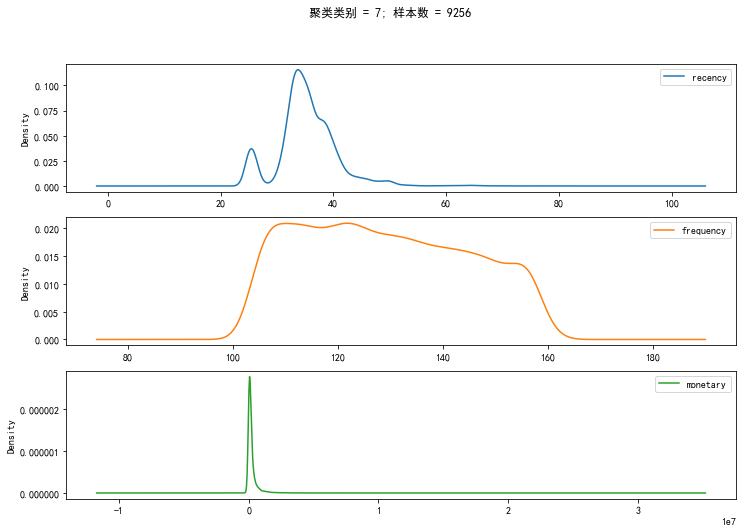

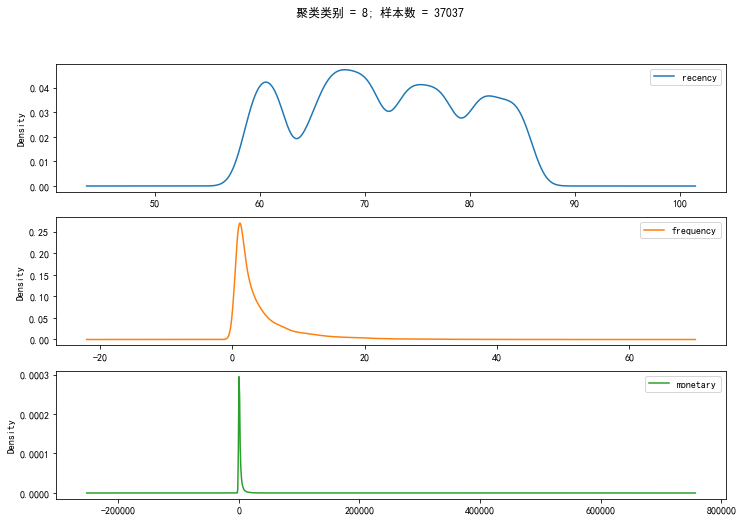

In [45]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
for i in range(1,9):
        cls=rfm_data.loc[rfm_data['cluster']==i, ['recency', 'frequency', 'monetary']]
        cls.plot(kind='kde',subplots=True,sharex=False, figsize=(12,8))
        plt.suptitle('聚类类别 = %d; 样本数 = %d' % (i, rfm_data[rfm_data['cluster'] == i]['cluster'].value_counts()))
plt.legend()
plt.show()

### 降维可视化

In [46]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne.fit_transform(min_max.reset_index(drop = True)) #进行数据降维
print(type(tsne))
tsne = pd.DataFrame(tsne.embedding_, index=min_max.index) #转换数据格式

<class 'sklearn.manifold.t_sne.TSNE'>


In [ ]:
for j in range(k):
        d=tsne[rfm_data['cluster']==j]
        plt.plot(d[0],d[1],'.')
plt.show()